In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from scipy.interpolate import RectBivariateSpline
import scipy.integrate as integrate
import scipy.optimize as optimize

In [3]:
P_vals = np.load('../data/P_s.npy')

kk = np.geomspace(1e-4, 1e2, 500)
zz = np.linspace(0, 8, 100)

P_interp = RectBivariateSpline( zz, kk, P_vals)

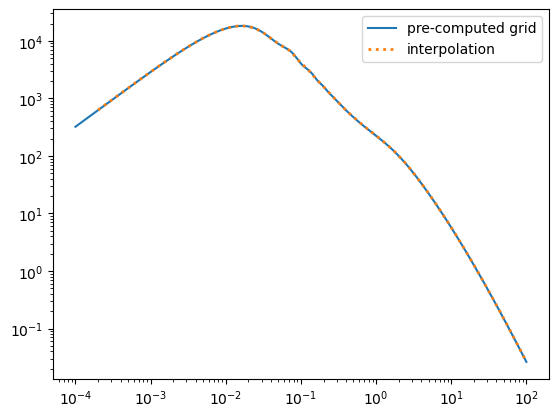

In [10]:
# Check that interpolation works

kk_ = np.geomspace(2e-04, 99)

plt.plot( kk, P_vals[ 4, : ], label='pre-computed grid' )
plt.plot( kk_, P_interp(0.32, kk_)[0], label='interpolation', ls=':', lw=2 )
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


In [11]:
# Here load the centers of the redshift bins

zcenters_use  = np.load('../data/max_23.npy') 
zcenters_use

array([0.29286822, 0.38042869, 0.45631443, 0.5263628 , 0.59057381,
       0.64894746, 0.7073211 , 0.75985738, 0.81239366, 0.87076731,
       0.92914095, 0.9875146 , 1.04588824, 1.11593661, 1.18598499,
       1.26770809, 1.36694329, 1.48369058, 1.64713678, 1.88646872])

In [12]:
def j1(x):
    return 3/(x**2)*(np.sin(x)/x-np.cos(x))


kmax=[]

for z_ in zcenters_use:

    def pk(k):
        return P_interp(z_, k)[0]

    def sig_sq(R):
        return integrate.quad(lambda x: 1/(2*np.pi**2)*x**2*( j1(x*R)**2 )*pk(x) , kk[0], kk[-1], limit=10000)[0]

    sol = optimize.root_scalar(lambda x: sig_sq(x)-0.25, bracket=[0.01, 20], method='bisect').root
    kmax_ = np.pi/sol/2
    kmax.append(kmax_)
    print(z_, kmax_)

kmax=np.asarray(kmax)

0.2928682235195996 0.11835702892785689
0.38042869057547957 0.1249529040628324
0.4563144286905755 0.13099035891529456
0.5263628023352793 0.1368253878657987
0.5905738115095913 0.14239358148841097
0.6489474562135112 0.1476367539786717
0.7073211009174312 0.15305194451369009
0.7598573811509591 0.1580729599188959
0.812393661384487 0.1632323322500637
0.8707673060884069 0.1691275291696685
0.9291409507923268 0.17520626335859785
0.9875145954962468 0.181453709927694
1.0458882402001666 0.18785528660177986
1.1159366138448705 0.19578463204733898
1.1859849874895745 0.2039709466708768
1.2677080900750624 0.2138414531587718
1.3669432860717263 0.22630418122918072
1.4836905754795662 0.2416474824948364
1.647136780650542 0.2643964128561443
1.8864687239366136 0.3004804360263151


In [24]:
def dcom(z, H0, Om):
    # comoving distance in Mpc
    zgrid = np.linspace(1e-10, z, 200)
    Ez = np.sqrt( Om*(1+zgrid)**3 +(1-Om) )
    return 3e05/H0*np.trapz(1/Ez, zgrid)

In [26]:

# in the line of code below, substitute dcom() with the comoving distance function used in colibri !

ellmax = np.asarray( [ dcom(zcenters_use[i], 67.7, 0.31)*k_ 
                      for i,k_ in enumerate(kmax)] ).astype(int)

ellmax

array([ 142,  191,  235,  278,  319,  358,  398,  435,  474,  518,  563,
        610,  659,  719,  782,  858,  955, 1075, 1255, 1545])